In [1]:
# Generate non-affine data transformations
import numpy as np
from scipy.misc import imread
import pandas as pd
from imgaug import augmenters
from PIL import Image
import os
from glob import glob
from shutil import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
LOCALIZER_DATA_DIR = '/a/data/fisheries_monitoring/data/localizers/'
BOX_FILE = LOCALIZER_DATA_DIR + 'original/'
CLASSES = ['NoF', 'YFT', 'ALB', 'BET', 'LAG', 'DOL', 'OTHER', 'SHARK']
#f_boxes = pd.read_csv(BOX_FILE,names = ["img", "x","y","width","height"])

In [23]:
def applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write) :
    for class_i in CLASSES : # for each class
        print '  Class ' + class_i + ' for ' + param_name
        if not os.path.exists(dir_name + '/' + class_i) :
            print dir_name + '/' + class_i + ' does not exist'
            os.mkdir(dir_name + '/' + class_i)
        os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            if os.path.exists(fname) and not over_write :
                continue
            img = np.array(imread(ff_img))
            aug_img = Image.fromarray(augmenter.augment_image(img))
            aug_img.save(fname)

In [9]:
# Add Dropout augmentation
over_write = True
aug_name = 'dropout'
params = [(20,), (45,)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.Dropout(param[0], per_channel=True)
    param_name = '_' + str(int(param[0])) 
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF
  Class YFT
/a/data/fisheries_monitoring/data/localizers/dropout/YFT does not exist
  Class ALB
/a/data/fisheries_monitoring/data/localizers/dropout/ALB does not exist
  Class BET
/a/data/fisheries_monitoring/data/localizers/dropout/BET does not exist
  Class LAG
/a/data/fisheries_monitoring/data/localizers/dropout/LAG does not exist
  Class DOL
/a/data/fisheries_monitoring/data/localizers/dropout/DOL does not exist
  Class OTHER
/a/data/fisheries_monitoring/data/localizers/dropout/OTHER does not exist
  Class SHARK
/a/data/fisheries_monitoring/data/localizers/dropout/SHARK does not exist
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK


In [24]:
# Add Blur augmentation
over_write = True
aug_name = 'blur'
params = [(2.0,), (5.0,)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.GaussianBlur(param[0])
    param_name = '_' + str(int(param[0])) 
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF for _2
  Class YFT for _2
  Class ALB for _2
  Class BET for _2
  Class LAG for _2
  Class DOL for _2
  Class OTHER for _2
  Class SHARK for _2
  Class NoF for _5
  Class YFT for _5
  Class ALB for _5
  Class BET for _5
  Class LAG for _5
  Class DOL for _5
  Class OTHER for _5
  Class SHARK for _5


In [25]:
# Add Inversion augmentation
over_write = True
aug_name = 'invert'
params = [(0.15,), (0.75,)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.Invert(param[0], per_channel=True, deterministic=True)
    param_name = '_' + str(int(param[0]*100))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF for _15
/a/data/fisheries_monitoring/data/localizers/invert/NoF does not exist
  Class YFT for _15
/a/data/fisheries_monitoring/data/localizers/invert/YFT does not exist
  Class ALB for _15
/a/data/fisheries_monitoring/data/localizers/invert/ALB does not exist
  Class BET for _15
/a/data/fisheries_monitoring/data/localizers/invert/BET does not exist
  Class LAG for _15
/a/data/fisheries_monitoring/data/localizers/invert/LAG does not exist
  Class DOL for _15
/a/data/fisheries_monitoring/data/localizers/invert/DOL does not exist
  Class OTHER for _15
/a/data/fisheries_monitoring/data/localizers/invert/OTHER does not exist
  Class SHARK for _15
/a/data/fisheries_monitoring/data/localizers/invert/SHARK does not exist
  Class NoF for _75
  Class YFT for _75
  Class ALB for _75
  Class BET for _75
  Class LAG for _75
  Class DOL for _75
  Class OTHER for _75
  Class SHARK for _75


In [27]:
# Add Gaussian Noise augmentation
over_write = True
aug_name = 'gaussianNoise'
params = [(30,), (51,), (80,)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.AdditiveGaussianNoise(scale=param[0], per_channel=True)
    param_name = '_' + str(int(param[0]))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/NoF does not exist
  Class YFT for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/YFT does not exist
  Class ALB for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/ALB does not exist
  Class BET for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/BET does not exist
  Class LAG for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/LAG does not exist
  Class DOL for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/DOL does not exist
  Class OTHER for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/OTHER does not exist
  Class SHARK for _30
/a/data/fisheries_monitoring/data/localizers/gaussianNoise/SHARK does not exist
  Class NoF for _51
  Class YFT for _51
  Class ALB for _51
  Class BET for _51
  Class LAG for _51
  Class DOL for _51
  Class OTHER for _51
  Class SHARK for _51
  Class NoF for _80
  Class YFT for _80
  Cl

In [26]:
# Add Emboss augmentation
over_write = True
aug_name = 'emboss'
params = [(1.0,1.75)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.Emboss(alpha=param[0], strength=param[1])
    param_name = '_' + str(int(param[0])) + '_' + str(int(param[1]*100))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/NoF does not exist
  Class YFT for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/YFT does not exist
  Class ALB for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/ALB does not exist
  Class BET for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/BET does not exist
  Class LAG for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/LAG does not exist
  Class DOL for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/DOL does not exist
  Class OTHER for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/OTHER does not exist
  Class SHARK for _1_175
/a/data/fisheries_monitoring/data/localizers/emboss/SHARK does not exist


In [44]:
# Add addition augmentation
over_write = True
aug_name = 'add'
params = [(75,),(-75,)]
dir_name = LOCALIZER_DATA_DIR + aug_name

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
copy(BOX_FILE, dir_name)

for param in params :
    augmenter = augmenters.Add(param[0], per_channel=True)
    param_name = '_' + str(int(param[0]))
    applyNonAffineAugmentation(dir_name, augmenter, param_name, over_write)

  Class NoF for _75
/a/data/fisheries_monitoring/data/localizers/add/NoF does not exist
  Class YFT for _75
/a/data/fisheries_monitoring/data/localizers/add/YFT does not exist
  Class ALB for _75
/a/data/fisheries_monitoring/data/localizers/add/ALB does not exist
  Class BET for _75
/a/data/fisheries_monitoring/data/localizers/add/BET does not exist
  Class LAG for _75
/a/data/fisheries_monitoring/data/localizers/add/LAG does not exist
  Class DOL for _75
/a/data/fisheries_monitoring/data/localizers/add/DOL does not exist
  Class OTHER for _75
/a/data/fisheries_monitoring/data/localizers/add/OTHER does not exist
  Class SHARK for _75
/a/data/fisheries_monitoring/data/localizers/add/SHARK does not exist
  Class NoF for _-75
  Class YFT for _-75
  Class ALB for _-75
  Class BET for _-75
  Class LAG for _-75
  Class DOL for _-75
  Class OTHER for _-75
  Class SHARK for _-75


In [15]:
# Add 90deg rotate augmentation
over_write = False
aug_name = 'rotate'
params = [(1,),(2,),(3,)]
dir_name = LOCALIZER_DATA_DIR + aug_name
pd.read_csv(BOX_FILE,names = ["img", "x","y","width","height"])
in_boxes = pd.read_csv(BOX_FILE+'boxes.csv',names = ["img", "x","y","width","height"])
in_superboxes = pd.read_csv(BOX_FILE+'superboxes.csv',names = ["img", "x","y","width","height"])

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
out_box = open(dir_name + '/boxes.csv','w')
out_superbox = open(dir_name + '/superboxes.csv','w')

for param in params :
    param_name = '_' + str(int(param[0]*90))
    for class_i in CLASSES : # for each class
        print '  Class ' + class_i + ' for ' + param_name
        if not os.path.exists(dir_name + '/' + class_i) :
            print dir_name + '/' + class_i + ' does not exist'
            os.mkdir(dir_name + '/' + class_i)
        os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            
            img = np.array(imread(ff_img))
            h,w,_ = img.shape
            if not os.path.exists(fname) or over_write : # Rotate and save the images
                aug_img = Image.fromarray(np.rot90(img, param[0]))
                aug_img.save(fname)
            
            # Write the box file stuff
            box_file_header = class_i + '/' + f_img + param_name + '.jpg,'
            super_boxes = in_superboxes[in_superboxes["img"] == (class_i + '/' + ff_img)]
            boxes = in_boxes[in_boxes["img"] == (class_i + '/' + ff_img)]
            for i in xrange(len(boxes)) :
                box = boxes.iloc[i,]
                x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                if param[0] == 1 : #90 deg rotation
                    box_file_write = box_file_header + str(y) + ',' + str(w-x-bb_w) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_box.write(box_file_write)
                elif param[0] == 2 : #180 deg rotation
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(h-y-bb_h) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_box.write(box_file_write)
                elif param[0] == 3 : #270deg rotation
                    box_file_write = box_file_header + str(h-y-bb_h) + ',' + str(x) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_box.write(box_file_write)
            for i in xrange(len(super_boxes)) :
                box = super_boxes.iloc[i,]
                x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                if param[0] == 1 : #90 deg rotation
                    box_file_write = box_file_header + str(y) + ',' + str(w-x-bb_w) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_superbox.write(box_file_write)
                elif param[0] == 2 : #180 deg rotation
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(h-y-bb_h) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_superbox.write(box_file_write)
                elif param[0] == 3 : #270deg rotation
                    box_file_write = box_file_header + str(h-y-bb_h) + ',' + str(x) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_superbox.write(box_file_write)
out_box.close()
out_superbox.close()

  Class NoF for _90
  Class YFT for _90
  Class ALB for _90
  Class BET for _90
  Class LAG for _90
  Class DOL for _90
  Class OTHER for _90
  Class SHARK for _90
  Class NoF for _180
  Class YFT for _180
  Class ALB for _180
  Class BET for _180
  Class LAG for _180
  Class DOL for _180
  Class OTHER for _180
  Class SHARK for _180
  Class NoF for _270
  Class YFT for _270
  Class ALB for _270
  Class BET for _270
  Class LAG for _270
  Class DOL for _270
  Class OTHER for _270
  Class SHARK for _270


526.633469141 117.700316885 426.034907701 377.747598209
854.584779438 440.118706303 280.669986419 276.143051154
117.700316885 327.331623158 377.747598209 426.034907701
440.118706303 144.745234143 276.143051154 280.669986419
327.331623158 224.552084905 426.034907701 377.747598209
144.745234143 3.73824254313 280.669986419 276.143051154
224.552084905 526.633469141 377.747598209 426.034907701
3.73824254313 854.584779438 276.143051154 280.669986419
249.0 47.0 565.0 565.0
394.0 0.0 303.0 151.0


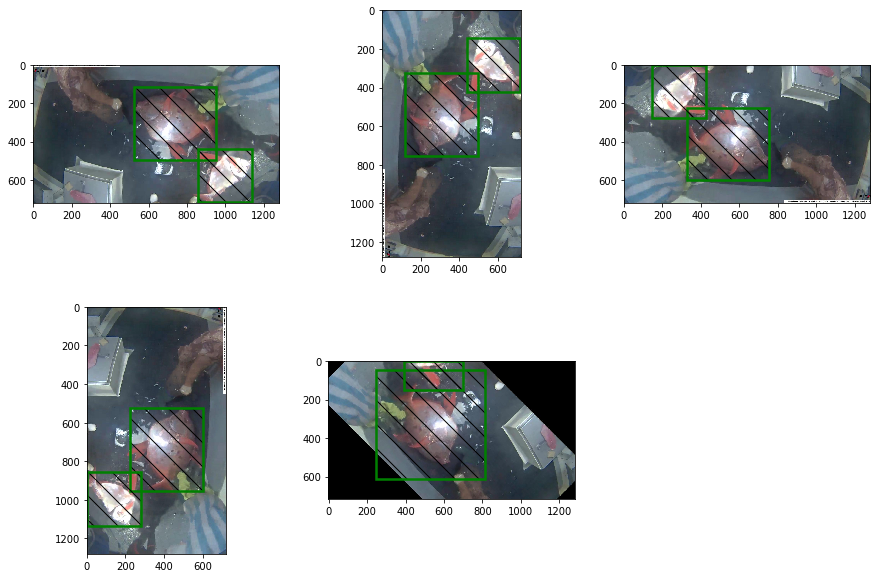

In [17]:
# Validate the rotations
#img_file = 'YFT/img_01973'
#img_file = 'YFT/img_02121'
img_file = 'LAG/img_01221'
box_file = LOCALIZER_DATA_DIR + '/rotate/boxes.csv'
boxes = pd.read_csv(box_file, names = ["img", "x","y","width","height"])
boxes_origg = pd.read_csv(LOCALIZER_DATA_DIR + '/original/boxes.csv', names = ["img", "x","y","width","height"])
boxes_orig = boxes_origg[boxes_origg['img'] == img_file + '.jpg']
boxes_225 = boxes[boxes['img'] == img_file + '_225.jpg']
boxes_90 = boxes[boxes['img'] == img_file + '_90.jpg']
boxes_180 = boxes[boxes['img'] == img_file + '_180.jpg']
boxes_270 = boxes[boxes['img'] == img_file + '_270.jpg']
img = np.array(imread(LOCALIZER_DATA_DIR + '/original/' + img_file + '.jpg'))
img_225 = np.array(imread(LOCALIZER_DATA_DIR + '/rotate/' + img_file + '_225.jpg'))
img_90 = np.array(imread(LOCALIZER_DATA_DIR + '/rotate/' + img_file + '_90.jpg'))
img_180 = np.array(imread(LOCALIZER_DATA_DIR + '/rotate/' + img_file + '_180.jpg'))
img_270 = np.array(imread(LOCALIZER_DATA_DIR + '/rotate/' + img_file + '_270.jpg'))
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2,3,1)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img)
for b in xrange(len(boxes_orig)) :
    bb = boxes_orig.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
ax = fig.add_subplot(2,3,2)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img_90)
for b in xrange(len(boxes_90)) :
    bb = boxes_90.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
ax = fig.add_subplot(2,3,3)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img_180)
for b in xrange(len(boxes_180)) :
    bb = boxes_180.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
ax = fig.add_subplot(2,3,4)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img_270)
for b in xrange(len(boxes_270)) :
    bb = boxes_270.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
ax = fig.add_subplot(2,3,5)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img_225)
for b in xrange(len(boxes_225)) :
    bb = boxes_225.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
#print orig_w
#print orig_h
#print c
#new_width = np.ceil(2*orig_w*np.cos(angle))
#new_height = np.ceil(2*orig_w*np.sin(angle))
#print new_width
#print new_height
#pad_img = np.zeros((int(new_height), int(new_width), c))
#augmenter = augmenters.Affine(rotate=45)
#aug_img = augmenter.augment_image(img)
#plt.imshow(img)
#plt.show()
#plt.imshow(rot_img)
#plt.show()
#bb_w = 250
#bb_h = 150

#ax = fig.add_subplot(1,2,1)
#ax.imshow(img)
#ax.add_patch(patches.Rectangle((600, 400),bb_w,bb_h,hatch='\\',fill=False, color='g'))
#ax = fig.add_subplot(1,2,2)
#ax.imshow(rot_img)
#ax.add_patch(patches.Rectangle(((400), orig_w-(600+bb_w)),bb_h,bb_w,hatch='\\',fill=False, color='g')) #90deg
#ax.add_patch(patches.Rectangle((orig_w-(600+bb_w), orig_h-(400+bb_h)),bb_w,bb_h,hatch='\\',fill=False, color='g')) #180deg
#ax.add_patch(patches.Rectangle((orig_h-(400+bb_h), 600),bb_h,bb_w,hatch='\\',fill=False, color='g'))#270deg
plt.show()

In [19]:
# Add arbitrary rotation
over_write = True
aug_name = 'rotate'
params = [(315,)]
dir_name = LOCALIZER_DATA_DIR + aug_name
pd.read_csv(BOX_FILE,names = ["img", "x","y","width","height"])
in_boxes = pd.read_csv(BOX_FILE+'boxes.csv',names = ["img", "x","y","width","height"])
in_superboxes = pd.read_csv(BOX_FILE+'superboxes.csv',names = ["img", "x","y","width","height"])

if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
out_box = open(dir_name + '/boxes.csv','a')
out_superbox = open(dir_name + '/superboxes.csv','a')

for param in params :
    param_name = '_' + str(int(param[0]))
    for class_i in CLASSES : # for each class
        print '  Class ' + class_i + ' for ' + param_name
        if not os.path.exists(dir_name + '/' + class_i) :
            print dir_name + '/' + class_i + ' does not exist'
            os.mkdir(dir_name + '/' + class_i)
        os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        augmenter = augmenters.Affine(rotate=param[0])
        for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            
            img = np.array(imread(ff_img))
            h,w,_ = img.shape
            if not os.path.exists(fname) or over_write : # Rotate and save the images
                aug_img = Image.fromarray(augmenter.augment_image(img))
                aug_img.save(fname)
            
            # Write the box file stuff
            box_file_header = class_i + '/' + f_img + param_name + '.jpg,'
            super_boxes = in_superboxes[in_superboxes["img"] == (class_i + '/' + ff_img)]
            boxes = in_boxes[in_boxes["img"] == (class_i + '/' + ff_img)]
            for i in xrange(len(boxes)) :
                mask = np.zeros((h,w,3),dtype=np.uint8)
                box = boxes.iloc[i,]
                x, y, bb_w, bb_h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
                mask[y:y+bb_h,x:x+bb_w,:] = 1
                mask_img = augmenter.augment_image(mask)
                for z in range(0,w) :
                    if np.sum(mask_img[:,z]) > 0 :
                        l = z
                        break
                for z in reversed(range(0,w)) :
                    if np.sum(mask_img[:,z]) > 0 :
                        r = z
                        break
                for z in range(0,h) :
                    if np.sum(mask_img[z,:]) > 0 :
                        t = z
                        break
                for z in reversed(range(0,h)) :
                    if np.sum(mask_img[z,:]) > 0 :
                        b = z
                        break
                box_file_write = box_file_header + str(l) + ',' + str(t) + ',' + str(r-l) + ',' + str(b-t) + '\n'
                out_box.write(box_file_write)
            for i in xrange(len(super_boxes)) :
                mask = np.zeros((h,w,3),dtype=np.uint8)
                box = super_boxes.iloc[i,]
                x, y, bb_w, bb_h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
                mask[y:y+bb_h,x:x+bb_w,:] = 1
                mask_img = augmenter.augment_image(mask)
                for z in range(0,w) :
                    if np.sum(mask_img[:,z]) > 0 :
                        l = z
                        break
                for z in reversed(range(0,w)) :
                    if np.sum(mask_img[:,z]) > 0 :
                        r = z
                        break
                for z in range(0,h) :
                    if np.sum(mask_img[z,:]) > 0 :
                        t = z
                        break
                for z in reversed(range(0,h)) :
                    if np.sum(mask_img[z,:]) > 0 :
                        b = z
                        break
                box_file_write = box_file_header + str(l) + ',' + str(t) + ',' + str(r-l) + ',' + str(b-t) + '\n'
                out_superbox.write(box_file_write)
out_box.close()
out_superbox.close()

  Class NoF for _315
  Class YFT for _315
  Class ALB for _315
  Class BET for _315
  Class LAG for _315
  Class DOL for _315
  Class OTHER for _315
  Class SHARK for _315


In [10]:
for k, v in aug_dict.iteritems() : # foreach augmentation
    print 'Running augmenter ' + k
    if not os.path.exists(LOCALIZER_DATA_DIR + k) :
        print LOCALIZER_DATA_DIR + k + ' does not exist'
        os.mkdir(LOCALIZER_DATA_DIR + k)
    copy(BOX_FILE, LOCALIZER_DATA_DIR + k)
    for class_i in classes : # for each class
        print '  Class ' + class_i
        if not os.path.exists(LOCALIZER_DATA_DIR + k + '/' + class_i) :
            print LOCALIZER_DATA_DIR + k + '/' + class_i + ' does not exist'
            os.mkdir(LOCALIZER_DATA_DIR + k + '/' + class_i)
        os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
        images = glob('*.jpg')
        for f_img in images :
            if os.path.exists(LOCALIZER_DATA_DIR + k + '/' + class_i + '/' + f_img) and not OVER_WRITE :
                continue
            img = np.array(imread(f_img))
            aug_img = Image.fromarray(aug_dict[k].augment_image(img))
            aug_img.save(LOCALIZER_DATA_DIR + k + '/' + class_i + '/' + f_img)

Running augmenter dropout
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter add_pos
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter add_neg
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter addGaussianNoise
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter blur
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter emboss
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK
Running augmenter invert
  Class NoF
  Class YFT
  Class ALB
  Class BET
  Class LAG
  Class DOL
  Class OTHER
  Class SHARK


In [6]:
# Add vertical flips on everything even the rotated images
rotations = ['', '_90','_180','_270']
over_write = True
aug_name = 'vflip'
params = [(1.0,)]
dir_name = LOCALIZER_DATA_DIR + aug_name


if not os.path.exists(dir_name) :
    os.mkdir(dir_name)
out_box = open(dir_name + '/boxes.csv','w')
out_superbox = open(dir_name + '/superboxes.csv','w')
for r in rotations :
    if r == '' :
        in_boxes = pd.read_csv(BOX_FILE+'boxes.csv',names = ["img", "x","y","width","height"])
        in_superboxes = pd.read_csv(BOX_FILE+'superboxes.csv',names = ["img", "x","y","width","height"])
    else :
        in_boxes = pd.read_csv(LOCALIZER_DATA_DIR + '/rotate/boxes.csv',names = ["img", "x","y","width","height"])
        in_superboxes = pd.read_csv(LOCALIZER_DATA_DIR + '/rotate/superboxes.csv',names = ["img", "x","y","width","height"])
    for param in params :
        param_name = '_' + str(int(param[0]))
        augmenter = augmenters.Fliplr(param[0])
        for class_i in CLASSES : # for each class
            print '  Class ' + class_i + ' for ' + param_name
            if not os.path.exists(dir_name + '/' + class_i) :
                print dir_name + '/' + class_i + ' does not exist'
                os.mkdir(dir_name + '/' + class_i)
            if r == '' :
                os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
            else :
                os.chdir(LOCALIZER_DATA_DIR + 'rotate/' + class_i)
            images = glob('*' + r + '.jpg')
            for ff_img in images :
                f_img = ff_img.split('.')[0]
                fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'

                img = np.array(imread(ff_img))
                h,w,_ = img.shape
                if not os.path.exists(fname) or over_write : # Rotate and save the images
                    aug_img = Image.fromarray(augmenter.augment_image(img))
                    aug_img.save(fname)

                # Write the box file stuff
                box_file_header = class_i + '/' + f_img + param_name + '.jpg,'
                super_boxes = in_superboxes[in_superboxes["img"] == (class_i + '/' + ff_img)]
                boxes = in_boxes[in_boxes["img"] == (class_i + '/' + ff_img)]
                for i in xrange(len(boxes)) :
                    box = boxes.iloc[i,]
                    x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(y) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_box.write(box_file_write)
                for i in xrange(len(super_boxes)) :
                    box = super_boxes.iloc[i,]
                    x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(y) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_superbox.write(box_file_write)
out_box.close()
out_superbox.close()

  Class NoF for _1
  Class YFT for _1
  Class ALB for _1
  Class BET for _1
  Class LAG for _1
  Class DOL for _1
  Class OTHER for _1
  Class SHARK for _1
  Class NoF for _1
  Class YFT for _1
  Class ALB for _1
  Class BET for _1
  Class LAG for _1
  Class DOL for _1
  Class OTHER for _1
  Class SHARK for _1
  Class NoF for _1
  Class YFT for _1
  Class ALB for _1
  Class BET for _1
  Class LAG for _1
  Class DOL for _1
  Class OTHER for _1
  Class SHARK for _1
  Class NoF for _1
  Class YFT for _1
  Class ALB for _1
  Class BET for _1
  Class LAG for _1
  Class DOL for _1
  Class OTHER for _1
  Class SHARK for _1


526.633469141 117.700316885 426.034907701 377.747598209
854.584779438 440.118706303 280.669986419 276.143051154
224.552084906 327.331623158 377.747598209 426.034907701
3.738242543 144.745234143 276.143051154 280.669986419


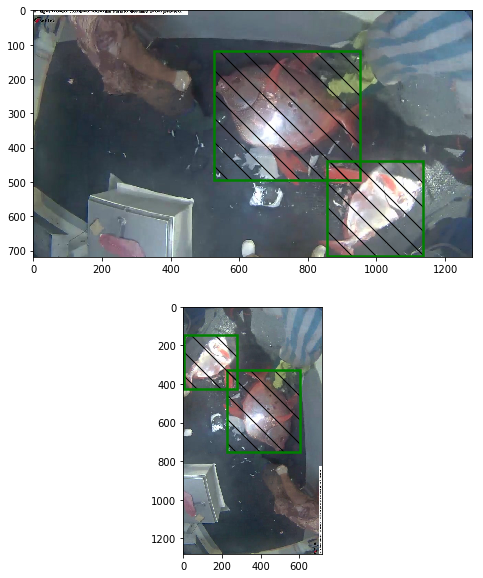

In [7]:
img_file = 'LAG/img_01221'
f_suffix = '_90_1.jpg'
box_file = LOCALIZER_DATA_DIR + '/vflip/boxes.csv'
boxes = pd.read_csv(box_file, names = ["img", "x","y","width","height"])
boxes_origg = pd.read_csv(LOCALIZER_DATA_DIR + '/original/boxes.csv', names = ["img", "x","y","width","height"])
boxes_orig = boxes_origg[boxes_origg['img'] == img_file + '.jpg']
boxes_flip = boxes[boxes['img'] == img_file + f_suffix]
img = np.array(imread(LOCALIZER_DATA_DIR + '/original/' + img_file + '.jpg'))
img_flip = np.array(imread(LOCALIZER_DATA_DIR + '/vflip/' + img_file + f_suffix))
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2,1,1)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img)
for b in xrange(len(boxes_orig)) :
    bb = boxes_orig.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
ax = fig.add_subplot(2,1,2)
#_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img_flip)
for b in xrange(len(boxes_flip)) :
    bb = boxes_flip.iloc[b,]
    x, y, w, h = bb[1], bb[2], bb[3], bb[4]
    ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
    print x, y, w, h
plt.show()